In [ ]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
from skimage import io, color

# Question 2:

In [ ]:
A = np.array([[3, 4], [-4, -3]]) # Create matrix
U,S,Vt = LA.svd(A) # Decompose

In [ ]:
# Check our deconstructed matrices
print(U)
print(S)
print(Vt)

[[-0.70710678  0.70710678]
 [ 0.70710678  0.70710678]]
[7. 1.]
[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]


In [ ]:
# (sig1, sig2) = (7, 1)

# Testing the reconstruction for sanity
A_reconst = U @ np.diag(S) @ Vt
A_reconst

array([[ 3.,  4.],
       [-4., -3.]])

In [ ]:
# values look like sqrt(2)/2, lets see:
print(np.sqrt(2)/2)
# yup!

0.7071067811865476

# Question 3:

Question 3a:

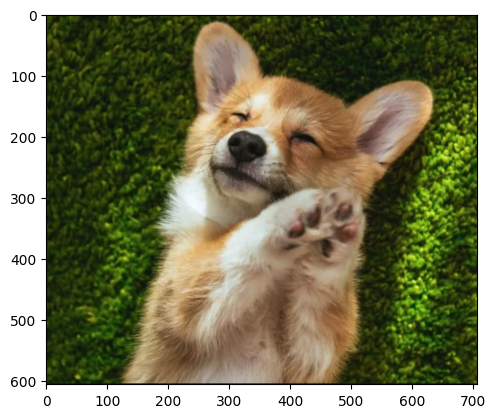

In [ ]:
pic = io.imread('/content/cute_puppy.JPG')
plt.imshow(pic)

In [ ]:
pic = color.rgb2gray(pic)

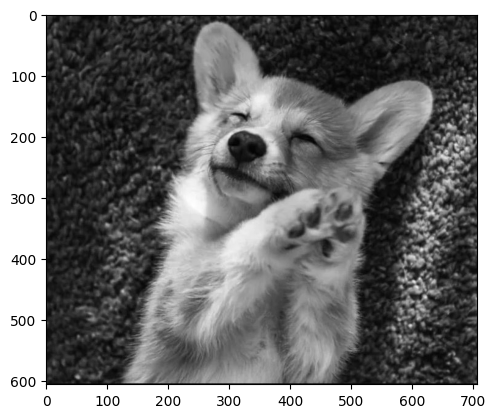

In [ ]:
plt.imshow(pic, cmap='gray')

In [ ]:
pic.shape

(606, 707)

Question 3b:

In [ ]:
U, S, Vt = LA.svd(pic)

In [ ]:
print(U.shape)
print(Vt.shape)
print(S[:5])

(606, 606)
(707, 707)
[250.28133021  47.74571472  41.71847033  33.71288006  30.00351633]


In [ ]:
r = 5
Ur = U[:, :r]
Vtr = Vt[:r, :]
Sr = np.diag(S[:5])

reconst = Ur@Sr@Vtr

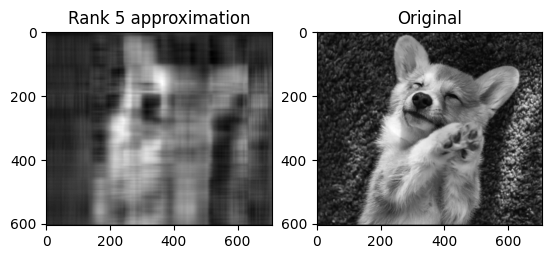

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.imshow(reconst, cmap='gray')
ax1.set_title("Rank 5 approximation")
ax2.imshow(pic, cmap='gray')
ax2.set_title("Original")
plt.show()

# Question 3c:

In [ ]:
errors = []
table_data = []
for r in range (10):
  Ur = U[:, :r]
  Vtr = Vt[:r, :]
  Sr = np.diag(S[:r])
  Ar = Ur@Sr@Vtr
  err = LA.norm(pic - Ar, ord=2)
  errors.append(err)
  table_data.append([(r+1), err])

print(errors[:5])

[250.28133021469975, 47.74571471918408, 41.71847032595305, 33.71288006019564, 30.003516334715105]


In [ ]:
# Create table of approx errors for each value of r
from tabulate import tabulate
print(tabulate(table_data, headers=['Rank r', 'Approximation Error']))

  Rank r    Approximation Error
--------  ---------------------
       1               250.281
       2                47.7457
       3                41.7185
       4                33.7129
       5                30.0035
       6                24.0435
       7                20.6756
       8                17.5505
       9                15.2356
      10                14.9866


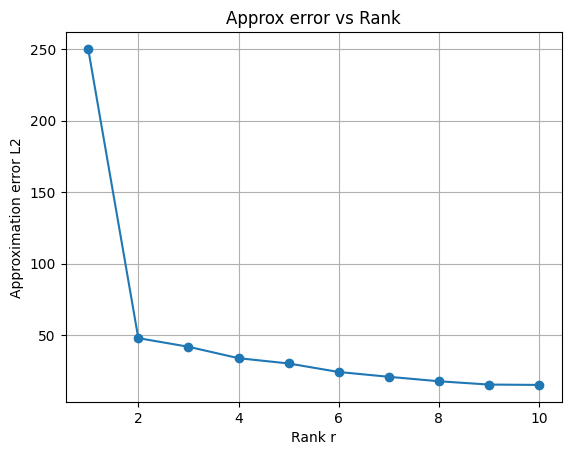

In [ ]:
plt.plot(range(1, 11), errors, marker='o')
plt.xlabel('Rank r')
plt.ylabel('Approximation error L2')
plt.title("Approx error vs Rank")
plt.grid(True)
plt.show()

As expected, as the r-value increases, the approximation error between the actual and reconstructed photo follows an 'exponential decay' trend/shape. In terms of singular values: the more singular values you keep, the more accurate your approximation will be. Additionally, if you only have a few singular values, adding or removing 1 value will make a much larger difference than if you have many singular values.